## **Оглавление:**
- [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section1)<div id='id-section2'/>
- [Вывод](#id-section3)<div id='id-section4'/>
- [Шаг 2. Подготовим данные к анализу](#id-section5)<div id='id-section6'/>
- [Приведем данные к нужному типу](#id-section7)<div id='id-section8'/>
- [Обработаем дубликаты](#id-section9)<div id='id-section10'/>
- [Проверим, есть ли пользователи, которые попали в разные группы A/B-теста и разные конкурирующие тесты](#id-section11)<div id='id-section12'/>
- [Вывод](#id-section13)<div id='id-section14'/>
- [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section15)<div id='id-section16'/>
- [Выполним необходимые объединения таблиц](#id-section17)<div id='id-section18'/>
- [Исключим из данных совпадение теста и маркетинговых событий](#id-section19)<div id='id-section20'/>
- [Исследуем конверсию в воронке на разных этапах](#id-section21)<div id='id-section22'/>
- [Исследуем распределение количества событий на пользователя в выборках](#id-section23)<div id='id-section24'/>
- [Посмотрим на число событий по дням в выборках](#id-section25)<div id='id-section26'/>
- [Вывод](#id-section27)<div id='id-section28'/>
- [Шаг 4. Изучим результаты эксперимента](#id-section29)<div id='id-section30'/>
- [Проведем оценку результатов A/B-тестирования](#id-section31)<div id='id-section32'/>
- [Проведем z-тест для проверки гипотезы о равенстве долей](#id-section33)<div id='id-section34'/>
- [Вывод](#id-section35)<div id='id-section36'/>
- [Шаг 5. Общий вывод](#id-section37)<div id='id-section38'/>

<div id='id-section1'/>

## [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section2)

Импортируем необходимые библиотеки.

Для вывода данных методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из длинных таблиц.

Также сразу посмотрим, какие типы данных хранятся в таблицах, воспользуемся методом `info()`.

In [46]:
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import datetime as dt
import numpy as np
from scipy import stats as st
import math as mth

In [47]:
try:
    ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
    final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
    final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')    
except:
    ab_project_marketing_events = pd.read_csv('ab_project_marketing_events.csv')
    final_ab_new_users = pd.read_csv('final_ab_new_users.csv')
    final_ab_events = pd.read_csv('final_ab_events.csv')
    final_ab_participants = pd.read_csv('final_ab_participants.csv') 
    

tables = [ab_project_marketing_events, final_ab_new_users, final_ab_events, final_ab_participants]

for table in tables:
    display(table)
    table.info()    

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


<div id='id-section3'/>

### [Вывод](#id-section4)

- Таблица `ab_project_marketing_events` - это самый маленький массив данных, в нем хранится 14 строк. Пропущенных значений в таблице нет. Категориальные переменные `name`, `regions` имеют тип данных `object` - это корректно. Переменные `start_dt`, `finish_dt` должны иметь тип данных `datetime`, а не `object`.
---
- В таблице `final_ab_new_users` хранится 61.7 тыс. строк. Пропущенных значений нет. Категориальные переменные `user_id`, `region`, `device` с типом данных `object` - корректно. Переменная `first_date` должна иметь тип данных `datetime` вместо `object`.
---
- В таблице `final_ab_events` 440 тыс. строк. Пропущенные значения есть в столбце `details` - это связано с тем, что данный столбец содержит дополнительную информацию о тратах на покупки (`purchase`). А для таких событий, как авторизация на сайте (`login`), заход на страницу продуктова (`product_page`), заход в корзину (`product_cart`) каких-либо дополнительных деталей нет. Категориальные переменные `user_id` и `event_name`, а также количественная переменная `details` имеют корретные типы данных - `object` и `float64`. Переменная `event_dt` должна иметь тип данных `datetime` вместо `object`.
---
- В таблице `final_ab_participants` хранится 18 тыс. строк. Пропущенных значений нет. Все переменные категориальные и имеют корректный тип данных. 

<div id='id-section5'/>

## [Шаг 2. Подготовим данные к анализу](#id-section6)

<div id='id-section7'/>

### [Приведем данные к нужному типу](#id-section8)

В трех таблицах есть переменные, обозначающие дату. У них должен быть тип данных `datetime`. Напишем функцию, которая методом `pd.to_datetime()` переведет столбец в нужный формат. Затем выпишем отдельно таблицы и столбцы, которые надо обработать, и для каждого элемента из списка применим функцию. + Выполним проверку. 

In [48]:
def datetime(df, column):
    df[column] = pd.to_datetime(df[column])
    
tables_columns = [[ab_project_marketing_events, 'start_dt'], [ab_project_marketing_events, 'finish_dt'], \
                  [final_ab_new_users, 'first_date'], [final_ab_events, 'event_dt']]    

for table in tables_columns:
    datetime(table[0], table[1])
    table[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 576.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 column

<div id='id-section9'/>

### [Обработаем дубликаты](#id-section10)

Поищем **полные дубликаты** во всех таблицах методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. Таблицы переберем в цикле из переменной `tables`, которую мы объявили на **Шаге 1**.

In [49]:
for table in tables:
    display(table.duplicated().sum())

0

0

0

0

Удалим из таблицы `final_ab_events` столбец с идентификатором пользователя и посмотрим, встречаются ли **дубликаты в таком случае**. Также посчитаем, сколько % от общего числа данных составляют такие дубликаты.

In [50]:
dup = final_ab_events.drop('user_id', axis = 1)

display(dup.duplicated().sum())

display(dup.duplicated().sum() / final_ab_events.shape[0])

15416

0.035011139701624054

- Дубликатов нашлось немного (3% от общего числа данных).
---

Удалим дубликаты из данных.

In [51]:
# меняем для дубликатов условие True на False. Теперь True только там, где дубликатов нет
not_duplicates = dup.duplicated().apply(lambda x: not x)

# оставляем в исходном датасете только те строки, которые попали под условие True 
# (накладываем Series not_duplicates без дубликатов)
final_ab_events = final_ab_events.loc[not_duplicates]

display(final_ab_events)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


Проверим, не содержит ли таблица `final_ab_new_users` (все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 г.) повторяющихся (неуникальных) пользователей. Каждый пользователь должен иметь только одну дату регистрации. Отсортируем данные по убыванию, чтобы все самые большие возможные значения были наверху.

In [52]:
display(final_ab_new_users.groupby('user_id')['first_date'].count().sort_values(ascending = False))

user_id
FFFFE36C0F6E92DF    1
55646CBDA408C9FD    1
5545992A45085197    1
5545492A601FE695    1
5543CE8C1906370E    1
                   ..
AA47A433929EE0CD    1
AA43F0C37A670E3B    1
AA4281556A9ECA98    1
AA408CA6C76DCEFE    1
0001710F4DDB1D1B    1
Name: first_date, Length: 61733, dtype: int64

- Повторяющихся пользователей в таблице `final_ab_new_users` нет.

<div id='id-section11'/>

### [Проверим, есть ли пользователи, которые попали в разные группы A/B-теста и разные конкурирующие тесты](#id-section12)

Для каждого пользователя найдем количество групп и тестов, в которые он попал, методом `count()`. Идеальное значение = 1 (1 группа и 1 тест). Отсортируем данные по убыванию, чтобы все самые большие возможные значения были наверху.

In [53]:
display(final_ab_participants\
        .groupby('user_id')['group'].count().sort_values(ascending = False))

user_id
147C62E5B82E2EA9    2
17123AD60527E78C    2
C765194AB5550498    2
A76F046D8D47589E    2
E6131DAD9E3CB151    2
                   ..
A5C73A9B0E44E70F    1
A5BF4057B45F0832    1
A5BF0467B3A1ED68    1
A5BBE87624764693    1
0002CE61FF2C4011    1
Name: group, Length: 16666, dtype: int64

- Мы видим, что в данных есть пользователи, которые попали в две группы A/B-теста и в 2 разных теста. **Это значит, что распределение пользователей по группам для проведения A/B-теста было проведено некорректно.**
- Для дальнейшего анализа нам необходимо отсортировать таких пользователей и убрать их из таблицы `final_ab_participants`.

In [54]:
bad_users = final_ab_participants.groupby('user_id')['group'].count().loc[lambda x: x == 2]
display(bad_users)

user_id
001064FEAAB631A1    2
00341D8401F0F665    2
003B6786B4FF5B03    2
0082295A41A867B5    2
00E68F103C66C1F7    2
                   ..
FF7BE2897FC0380D    2
FF9A81323FA67D6E    2
FFC53FD45DDA5EE8    2
FFED90241D04503F    2
FFF28D02B1EACBE1    2
Name: group, Length: 1602, dtype: int64

Узнаем, сколько пользователей мы потеряем, если удалим тех, кто попал в две группы и в два теста, из общей таблицы участников.

In [55]:
display(bad_users.shape[0] / final_ab_participants.groupby('user_id')['group'].count().shape[0])

0.09612384495379815

- При удалении мы потеряем 9% пользователей, это много, что доказывает, что **при делении пользователей не соблюдались требования к A/B-тестированию о том, что одни и те же пользователи не должны попадать в 2 разные группы, а также одновременно участвовать в конкурирующих тестах (их вообще не стоит проводить).** 
---
Очистим таблицу от пользователей.

In [56]:
final_ab_participants = final_ab_participants[~final_ab_participants.user_id.isin(bad_users.index)]

Также очистим таблицу от уникальных пользователей, которые участвовали в конкурирующем тесте `interface_eu_test`.

In [57]:
final_ab_participants = final_ab_participants[final_ab_participants['ab_test'] != 'interface_eu_test']

Проверим, сколько пользователей у нас осталось после полного очищения таблицы.

In [58]:
display(final_ab_participants.shape[0])

5099

- У нас осталось 5099 пользователей, которые участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо в B.

<div id='id-section13'/>

### [Вывод](#id-section14)

На данном этапе мы:
- изменили тип данных в столбцах с датами и временем на `datetime`;
- проверили, что полные дубликаты в таблицах отсутствуют;
- убрали из таблицы `final_ab_events` неполные дубликаты (3% от общего числа данных);
- проверили, что в таблице `final_ab_new_users` каждый пользователь имеет только одну дату регистрации;
---
- увидели, что в таблице `final_ab_participants` было 9% пользователей, которые попали в две группы A/B-теста и в 2 разных теста. Значит, **при делении пользователей не соблюдались требования к A/B-тестированию о том, что одни и те же пользователи не должны попадать в 2 разные группы одного теста, а также одновременно участвовать в конкурирующих тестах (их вообще не стоит проводить).** Данные были очищены от таких пользователей;
- также были удалены уникальные пользователи, которые участвовали в конкурирующем тесте `interface_eu_test`;
- в итоге в таблице `final_ab_participants` осталось 5099 пользователей, которые участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо в B.

<div id='id-section15'/>

## [Шаг 3. Проведем исследовательский анализ данных (EDA)](#id-section16)

<div id='id-section17'/>

### [Выполним необходимые объединения таблиц](#id-section18)

1. Присоединим к таблице `final_ab_new_users` (все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 г.) таблицу `final_ab_participants` (5099 пользователей, которые участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо в B).

Нам важно сохранить информацию только по 5099 пользователям из `final_ab_participants`, поэтому тип присоединения - `right`.

In [59]:
final_ab_new_users = final_ab_new_users.merge(final_ab_participants, on = 'user_id', how = 'right')

display(final_ab_new_users.head(), \
        final_ab_new_users.shape[0])


,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
2,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
3,29C92313A98B1176,2020-12-07,APAC,Android,B,recommender_system_test
4,7D1BFB181017EB46,2020-12-07,CIS,PC,B,recommender_system_test


5099

По условию технического задания оставим только тех пользователей, которые пришли из региона `EU`. 

In [60]:
final_ab_new_users = final_ab_new_users[final_ab_new_users['region'] == 'EU']

display(final_ab_new_users.head(), \
        final_ab_new_users.shape[0])

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-07,EU,Android,A,recommender_system_test
2,4CB179C7F847320B,2020-12-07,EU,iPhone,B,recommender_system_test
5,16C69ED14DA9F4A8,2020-12-07,EU,PC,B,recommender_system_test
6,3C5DD0288AC4FE23,2020-12-07,EU,PC,A,recommender_system_test


4749

- Мы видим, что **уже сейчас условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается.** 
- У нас осталось только 4749 пользователей, которые пришли в период с 7 по 21 декабря 2020 г. из региона `EU`, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B.
---

Проверим, какова в разных группах доля новых пользователей из региона `EU`.

In [61]:
display(final_ab_new_users.groupby('device')['group'].value_counts(normalize = True))

device   group
Android  A        0.557069
         B        0.442931
Mac      A        0.586288
         B        0.413712
PC       A        0.593333
         B        0.406667
iPhone   A        0.568706
         B        0.431294
Name: group, dtype: float64

- **Условие технического задания о том, что аудитория теста - 15% новых пользователей из региона EU, не соблюдается.**
- В реальности с каждого устройства в группу В попадает примерно 40% новых пользователей из EU.
---

Проверим, какая доля новых пользователей из региона EU в разных группах в зависимости от даты регистрации.

first_date  group
2020-12-07  A        0.584270
            B        0.415730
2020-12-08  A        0.567227
            B        0.432773
2020-12-09  A        0.581395
            B        0.418605
2020-12-10  B        0.522968
            A        0.477032
2020-12-11  A        0.589109
            B        0.410891
2020-12-12  A        0.583333
            B        0.416667
2020-12-13  A        0.585542
            B        0.414458
2020-12-14  A        0.577825
            B        0.422175
2020-12-15  A        0.604167
            B        0.395833
2020-12-16  A        0.592417
            B        0.407583
2020-12-17  A        0.584000
            B        0.416000
2020-12-18  A        0.533333
            B        0.466667
2020-12-19  A        0.570533
            B        0.429467
2020-12-20  A        0.567416
            B        0.432584
2020-12-21  A        0.571429
            B        0.428571
Name: group, dtype: float64

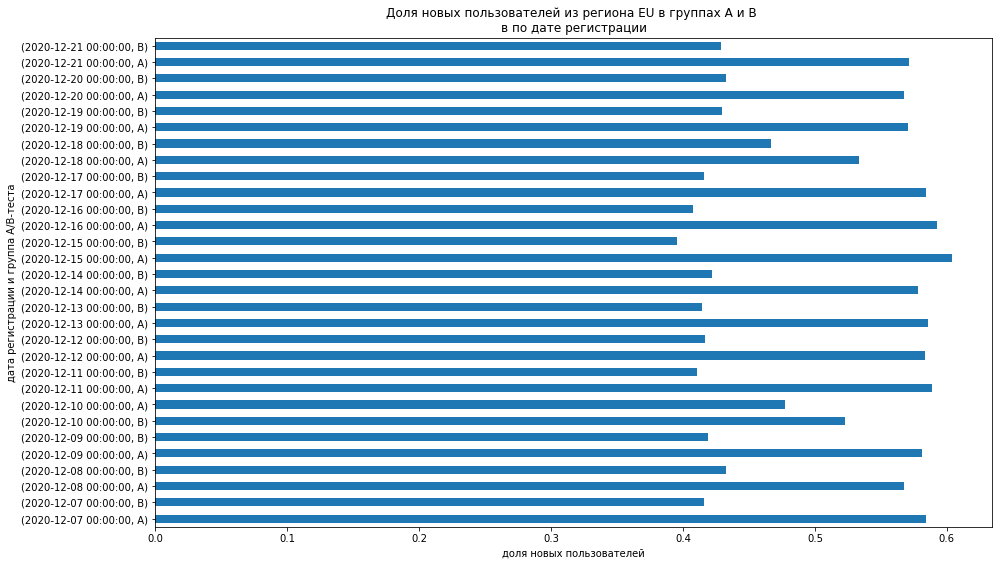

In [62]:
display(final_ab_new_users.groupby('first_date')['group'].value_counts(normalize = True))

ax = final_ab_new_users.groupby('first_date')['group'].value_counts(normalize = True).plot(kind = 'barh', \
          figsize = (15, 9),title = ('Доля новых пользователей из региона EU в группах А и В \nв по дате регистрации'))
ax.set_xlabel('доля новых пользователей')
ax.set_ylabel('дата регистрации и группа A/B-теста')
plt.show()

- Мы снова убедились: **условие технического задания о том, что аудитория теста - 15% новых пользователей из региона EU, не соблюдается.**
- В каждый день набора пользователей в группу В попадало примерно 40% новых пользователей из EU.

---
2. Присоединим к таблице `final_ab_events` (все события всех новых пользователей в период с 7 декабря 2020 по 4 января 2021 года) таблицу `final_ab_new_users` (пользователи, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B). 

Нам важно сохранить данные по отобранным пользователям, поэтому тип присоединения - `right`.

In [63]:
final_ab_events = final_ab_events.merge(final_ab_new_users, on = 'user_id', how = 'right')

display(final_ab_events)

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
...,...,...,...,...,...,...,...,...,...
19089,7EA72BCB46012967,NaT,NaN,NaN,2020-12-20,EU,iPhone,B,recommender_system_test
19090,1942FB76074AA16F,NaT,NaN,NaN,2020-12-20,EU,PC,B,recommender_system_test
19091,6670B7F8E44E51A9,NaT,NaN,NaN,2020-12-20,EU,Android,B,recommender_system_test
19092,FB99C8676FAF89A7,NaT,NaN,NaN,2020-12-20,EU,PC,B,recommender_system_test


- Мы видим, что в хвосте таблицы **есть пользователи, которые были набраны с 7 по 21 декабря 2020 года, но не совершали никаких действий. Возможно, А/В-тест был настроен неправильно, и ему не нужно было захватывать пользователей, которые не совершили хотя бы одного события.**
- Такие пользователи должны быть удалены, так как для они не участвуют ни в каких событиях, для дальнейшего анализа они не могут дать ничего. 

In [64]:
final_ab_events = final_ab_events.dropna(subset = ['event_name'])
display(final_ab_events)

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,recommender_system_test
1,831887FE7F2D6CBA,2020-12-09 02:19:17,purchase,99.99,2020-12-07,EU,Android,A,recommender_system_test
2,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
3,831887FE7F2D6CBA,2020-12-08 10:52:27,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
4,831887FE7F2D6CBA,2020-12-09 02:19:17,product_cart,NaN,2020-12-07,EU,Android,A,recommender_system_test
...,...,...,...,...,...,...,...,...,...
16931,F24DA4C9406263D2,2020-12-22 02:24:34,login,NaN,2020-12-17,EU,Mac,A,recommender_system_test
16932,966E398BAC214D29,2020-12-22 14:44:19,login,NaN,2020-12-18,EU,PC,A,recommender_system_test
16933,BAF6250F863EFA7E,2020-12-23 09:35:58,login,NaN,2020-12-13,EU,iPhone,A,recommender_system_test
16934,BAF6250F863EFA7E,2020-12-26 04:10:04,login,NaN,2020-12-13,EU,iPhone,A,recommender_system_test


<div id='id-section19'/>

### [Исключим из данных совпадение теста и маркетинговых событий](#id-section20)

Сначала посмотрим, как распределен временной период данных для пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, а также совершили действия на платформе.

In [65]:
display(final_ab_events['event_dt'].describe())

count                   16936
unique                  11418
top       2020-12-16 22:04:37
freq                        4
first     2020-12-07 00:16:00
last      2020-12-30 06:42:52
Name: event_dt, dtype: object

- Здесь мы видим, что действия пользователей фиксируются с 2020-12-07 (совпадает с датой, когда они только пришли) по 2020-12-30.
- Это значит, что **условие из технического задания с датой остановки теста 2021-01-04 не соблюдается для пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, а также совершили действия на платформе**. Потеряно 5 дней.
- Вероятно, до 2021-01-04 фиксировались действия тех пользователей, которые попали в конкурирующий тест, либо пришли из других регионов, либо попали сразу в 2 группы A/B-теста - то есть те пользователи, которых мы удалили из данных как неподходящих для анализа.

---
Выведем календарь маркетинговых событий.

In [66]:
display(ab_project_marketing_events)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


- Мы видим, что **есть 2 события, которые совпадают с действиями пользователей (`Christmas&New Year Promo` и `CIS New Year Gift Lottery`) - это указывает на некорректные сроки проведения A/B-теста** - так как он не должен совпадать с маркетинговыми событиями, чтобы исключить влияние на действия пользователей и не исказить результаты тестирования.

Для очистки данных нам достаточно исключить из данных все события после 2020-12-25.

In [67]:
final_ab_events = final_ab_events.query('event_dt < "2020-12-25"')

---
Посмотрим, действия для скольких пользователей мы можем анализировать после окончательной очистки данных.

In [68]:
display(final_ab_events['user_id'].nunique())

2587

- Всего у нас есть 2587 пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, совершили действия на платформе, которые при этом не совпали с маркетинговыми событиями. 
- Следовательно, **условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается**.

<div id='id-section21'/>

### [Исследуем конверсию в воронке на разных этапах](#id-section22)

Посмотрим, какие события есть в данных, и их частоту. Используем метод `value_counts()` для просмотра всех возможных событий и того, как часто они встречаются в данных.

,event_name
login,6504
product_page,4126
product_cart,2023
purchase,2005


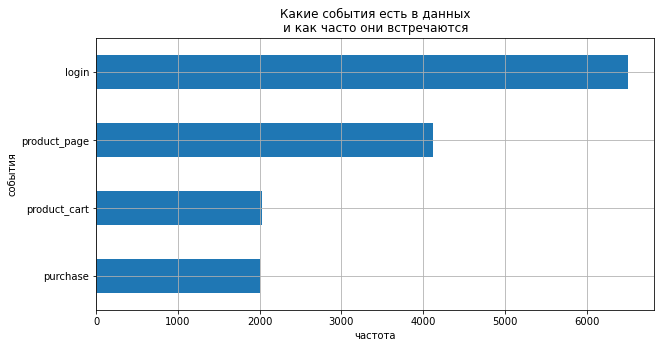

In [69]:
display(final_ab_events['event_name'].value_counts().to_frame())

ax = final_ab_events['event_name'].value_counts().sort_values().plot(kind = 'barh', \
                title = 'Какие события есть в данных\nи как часто они встречаются', grid = True, figsize = (10, 5))
ax.set_xlabel('частота')
ax.set_ylabel('события')
plt.show()

- Самое часто встречающееся событие - `login`, авторизированный вход на платформу интернет-магазина.
- Самое редкое событие - `purchase`, оплата покупки.
- Судя по данным, практически всегда после перехода в корзину пользователь оплачивает товары.
- Последовательность событий пока выглядит логичной.
---

Посчитаем, сколько пользователей совершали каждое из этих событий.

Методом `pivot_table()` построим сводную таблицу `event_user`, где по каждому событию найдем количество уникальных пользователей, и отсортируем события по числу пользователей.

In [70]:
event_user = final_ab_events.pivot_table(index = 'event_name', values = 'user_id', aggfunc=lambda x: x.nunique())\
.reset_index().sort_values(by = 'user_id', ascending = False)
display(event_user)

,event_name,user_id
0,login,2570
2,product_page,1622
3,purchase,803
1,product_cart,773


- По данной таблице видно, что покупателей, которые оплачивают покупки, больше, чем тех, кто сначала переходит в корзину с товарами.
- Это говорит о том, что **на платформе интернет-магазина реализована функция быстрой оплаты товаров в обход корзины, и пользователи часто используют эту функцию.**

Методом `go.Funnel()` из библиотеки `plotly` построим интерактивный график воронки событий.

Наведя указатель мыши на каждый шаг воронки, мы увидим подробную информацию:
1. Сколько % на этом шаге составляет число пользователей от первого шага (`of initial`); 
2. Сколько % составляет число пользователей от предыдущего шага (`of previous`).

In [71]:
fig = go.Figure(go.Funnel(
    y = event_user['event_name'].to_list(),
    x = event_user['user_id'].to_list(),
    textposition = "inside",
    textinfo = "value+percent initial",
    hoverinfo='x+y+percent initial+percent previous',
    marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"]}
    ))

fig.update_layout(
    title={
        'text': "Воронка событий в интернет-магазине",
        'y':0.9,
        'x':0.52,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig.show() 



- 31% от авторизовавшихся покупателей доходит до оплаты покупки. 
- Это довольно оптимистичное значение, но мы не можем считать его объективным, так как данные по пользователям были собраны с многочисленными нарушениями.

---
Построим график воронки событий по разными группам A/B-теста. 

Сначала создадим сводные таблицы `event_user_a` и `event_user_b`, где для каждой группы по каждому событию найдем количество уникальных пользователей.

In [72]:
event_user_a = final_ab_events.query('group == "A"').pivot_table(index = 'event_name', values = 'user_id', aggfunc=lambda x: x.nunique())\
.reset_index().sort_values(by = 'user_id', ascending = False)
display(event_user_a)

,event_name,user_id
0,login,1922
2,product_page,1257
3,purchase,613
1,product_cart,589


In [73]:
event_user_b = final_ab_events.query('group == "B"').pivot_table(index = 'event_name', values = 'user_id', aggfunc=lambda x: x.nunique())\
.reset_index().sort_values(by = 'user_id', ascending = False)
display(event_user_b)

,event_name,user_id
0,login,648
2,product_page,365
3,purchase,190
1,product_cart,184


- Пользователей в группе А значительно больше, чем в В - это **нарушение условия равномерного разделения пользователей на группы при А/В-тестировании**. 
- Для каждой из групп характерна общая тенденция о том, что пользователи часто используют функцию быстрой оплаты товаров в обход корзины.

---
Выведем результат на объединенный график по группам.

In [74]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'группа A',
    y = event_user_a['event_name'].to_list(),
    x = event_user_a['user_id'].to_list(),
    textinfo = "value+percent initial",
    hoverinfo='x+y+percent initial+percent previous'))

fig.add_trace(go.Funnel(
    name = 'группа B',
    orientation = "h",
    y = event_user_b['event_name'].to_list(),
    x = event_user_b['user_id'].to_list(),
    textposition = "inside",
    textinfo = "value+percent initial",
    hoverinfo='x+y+percent initial+percent previous'))



fig.update_layout(
    title={
        'text': "Воронка событий в интернет-магазине по группам A/B-теста",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)


fig.show()

- На графике видно, что численность пользователей в группе А на всех этапах конверсии больше, чем в группе В - это **нарушение условия равномерного разделения пользователей на группы при А/В-тестировании**.
- Для каждой из групп характерна общая тенденция о том, что пользователи часто используют функцию быстрой оплаты товаров в обход корзины.
- В процентных соотношениях доли перехода на этапы воронки в обеих группах похожи.
- По 30% пользователей из обеих групп, которые авторизировались на платформе, оплатили покупки.

<div id='id-section23'/>

### [Исследуем распределение количества событий на пользователя в выборках](#id-section24)

Для двух групп построим рядом гистограммы распределения количества событий на пользователя.

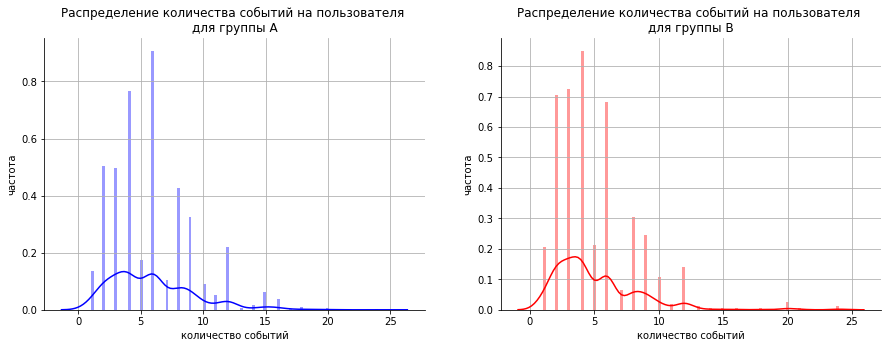

In [75]:
fig, (a, b) = plt.subplots(1, 2, figsize = (15, 5))     
sns.distplot(final_ab_events.query('group == "A"').groupby('user_id')['event_name'].count(), bins = 100, color = 'blue', ax = a)
a.set_xlabel('количество событий')
a.set_ylabel('частота')
a.set_title(f'Распределение количества событий на пользователя \nдля группы А')
a.grid()
sns.despine()
    
sns.distplot(final_ab_events.query('group == "B"').groupby('user_id')['event_name'].count(), bins = 100, color = 'red', ax = b)
b.set_xlabel('количество событий')
b.set_ylabel('частота')
b.set_title(f'Распределение количества событий на пользователя \nдля группы B')
b.grid()
sns.despine()

- На первый взгляд, распределение количества событий на пользователя в двух группах выглядит похожим.
- В группе А больше пользователей, которые совершали много событий (от 10 до 16).
- В группе В больше пользователей, которые совершали мало событий (от 1 до 5).

<div id='id-section25'/>

### [Посмотрим на число событий по дням в выборках](#id-section26)

Для двух групп построим рядом графики числа событий по дням.

Для удобного отображения создадим столбец только с датой, без времени.

In [76]:
final_ab_events['event_date'] = final_ab_events['event_dt'].dt.date

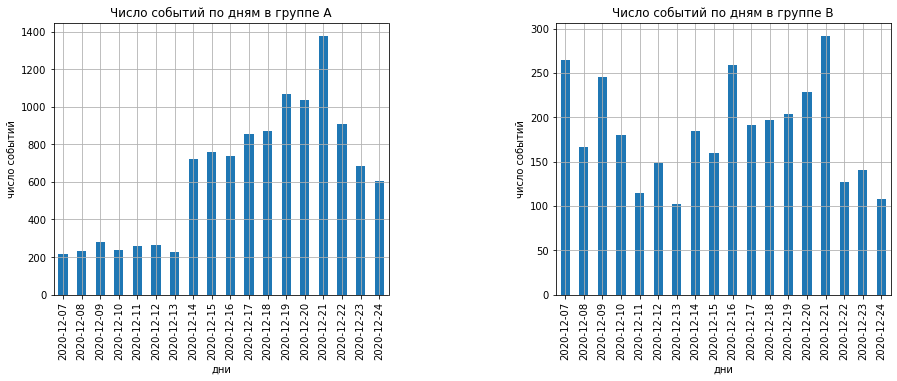

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

final_ab_events.query('group == "A"').groupby('event_date')['event_name'].count().plot(kind = 'bar', title = \
    'Число событий по дням в группе A', grid = True, ax = ax1)
ax1.set_xlabel('дни')
ax1.set_ylabel('число событий')


final_ab_events.query('group == "B"').groupby('event_date')['event_name'].count().plot(kind = 'bar', title = \
    'Число событий по дням в группе B', grid = True, ax = ax2)
ax2.set_xlabel('дни')
ax2.set_ylabel('число событий')
plt.show()

- Группа А значительно превосходит группу В по числу событий по дням. **Это также может свидетельствовать о некорректном разделении пользователей на две группы**.
- Особенно виден резкий скачок в количестве событий в группе А, начиная с 14 декабря. Данное явление может говорить о влиянии на пользователей из группы А какого-то события, которого не было в календаре маркетинговых событий за год. **Этот аспект тоже говорит о возможном нарушении методики тестирования.**
- В группе В такого резкого разрыва в числе событий не наблюдается. Меньше всего событий произошло 13 декабря.
- В обеих группах максимальное количество событий произошло 21 декабря. На это мог повлиять какой-то внешний фактор, который также говорит **не в пользу проведенного А/В-тестирования.**

<div id='id-section27'/>

### [Вывод](#id-section28)

Исследовательский анализ данных привел нас к следующим результатам:

- В данных присутствовали 9% пользователей (достаточно большое значение), которые попали в две группы A/B-теста и в 2 разных теста. Значит, **при делении пользователей не соблюдались требования к A/B-тестированию о том, что одни и те же пользователи не должны попадать в 2 разные группы одного теста, а также одновременно участвовать в конкурирующих тестах (их вообще не стоит проводить)**. 

- Уже на этапе объединения таблиц `final_ab_new_users` (все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 г.) и `final_ab_participants` (5099 пользователей, которые участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо в B) мы обнаружили, что **уже на данном этапе условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается.** У нас осталось только 4749 пользователей, которые пришли в период с 7 по 21 декабря 2020 г. из региона EU, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B.

- При вычислении доли новых пользователей из региона EU в разных группах в зависимости от типа устройства и даты регистрации мы увидели, что **условие технического задания о том, что аудитория теста - 15% новых пользователей из региона EU, не соблюдается.** В реальности с каждого устройства и в каждый день набора пользователейв группу В попадало примерно 40% новых пользователей из EU.

- При объединении таблиц `final_ab_events` (все события всех новых пользователей в период с 7 декабря 2020 по 4 января 2021 года) и `final_ab_new_users` (пользователи, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B) мы заметили, что есть такие пользователи, которые были набраны с 7 по 21 декабря 2020 года, но не совершали никаких действий на платформе. **Возможно, А/В-тест был настроен неправильно, и ему не нужно было захватывать пользователей, которые не совершили хотя бы одного события.**

- Временной период в данных зафиксирован с 2020-12-07 по 2020-12-30. Это значит, что **условие из технического задания с датой остановки теста 2021-01-04 не соблюдается для пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, а также совершили действия на платформе.** Для таких пользователей потеряно 5 дней.

- Вероятно, до 2021-01-04 фиксировались действия тех пользователей, которые попали в конкурирующий тест, либо пришли из других регионов, либо попали сразу в 2 группы A/B-теста - то есть те пользователи, которых мы удалили из данных как неподходящих для анализа.

- Было 2 маркетинговых события из календаря, которые совпали с действиями пользователей (`Christmas&New Year Promo` и `CIS New Year Gift Lottery`) - это указывает на **некорректные сроки проведения A/B-теста - так как он не должен совпадать с маркетинговыми событиями, чтобы исключить влияние на действия пользователей и не исказить результаты тестирования.**

- После очищения данных у нас осталось только 2587 пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, совершили действия на платформе, которые по времени не совпали ни с какими с маркетинговыми событиями. Следовательно, **условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается.**

---
На очищенных мы обнаружили такие закономерности:

- Самое часто встречающееся событие для пользователей - `login`, авторизированный вход на платформу интернет-магазина.
- Самое редкое событие - `purchase`, оплата покупки.
- Судя по данным, практически всегда после перехода в корзину пользователь оплачивает товары.

---
- Количество покупателей, которые оплачивают покупки, больше, чем тех, кто сначала переходит в корзину с товарами.
- Это говорит о том, что на платформе интернет-магазина реализована функция быстрой оплаты товаров в обход корзины, и пользователи часто используют эту функцию.

---
Построение воронки событий на очищенных данных показало:
- 31% от авторизовавшихся покупателей доходит до оплаты покупки.
- Это довольно оптимистичное значение, но мы не можем считать его объективным, так как данные по пользователям были собраны с многочисленными нарушениями.


На графике воронки событий по разным группам A/B-теста видно:
- Численность пользователей в группе А на всех этапах конверсии больше, чем в группе В - это **нарушение условия равномерного разделения пользователей на группы при А/В-тестировании.**
- Для каждой из групп характерна общая тенденция о том, что пользователи часто используют функцию быстрой оплаты товаров в обход корзины.
- В процентных соотношениях доли перехода на этапы воронки в обеих группах похожи.
- По 30% пользователей из обеих групп, которые авторизировались на платформе, оплатили покупки.

---
Анализ распределения количества событий на пользователя показал:
- В группе А больше пользователей, которые совершали много событий (от 10 до 16).
- В группе В больше пользователей, которые совершали мало событий (от 1 до 5).


Анализ числа событий по дням в выборках показал:
- Группа А значительно превосходит группу В по числу событий по дням. Это также может свидетельствовать о **некорректном разделении пользователей на две группы.**
- Особенно виден резкий скачок в количестве событий в группе А, начиная с 14 декабря. Данное явление может говорить о **влиянии на пользователей из группы А какого-то события, которого не было в календаре маркетинговых событий за год. Этот аспект тоже говорит о возможном нарушении методики тестирования.**
- В группе В такого резкого разрыва в числе событий не наблюдается. Меньше всего событий произошло 13 декабря.
- В обеих группах максимальное количество событий произошло 21 декабря. На это мог **повлиять какой-то внешний фактор, который также говорит не в пользу проведенного А/В-тестирования.**


<div id='id-section29'/>

## [Шаг 4. Изучим результаты эксперимента](#id-section30)


<div id='id-section31'/>

### [Проведем оценку результатов A/B-тестирования](#id-section32)

Все выделенные нами выше факторы указывают на то, что А/В-тестирование было проведено **некорректно, с нарушением методологии.**
- Результаты A/B-теста очень чувствительны к качеству сбора данных, а оно было низким.
- Количество пользователей в группах различается.
- Общее количество пользователей-участников А/В-тестирования небольшое (2587), а для оценки результатов A/B-теста данных должно быть много, выборки должны быть не только верно сформированными, но и большими, чтобы максимально стремиться к объективности.
- Попавший в одну из групп посетитель не остается в этой группе до конца теста. А если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.
- Одновременно проводилось 2 теста, в которых участвовали одни и те же пользователи.
- Время проведения А/В-тестирования совпало с маркетинговыми событиями, также обнаружилось влияние события, которого не было в календаре. 
- А/В-тестирование не соответствует заявленному техническому заданию.

Соответственно, **результаты проведенного A/B-тестирования  нерепрезентативны и не помогут нам определить, существуют ли изменения, связанные с внедрением улучшенной рекомендательной системы.** Никакой практической пользы это тестирование принести не может.

---
Дальнейшая проверка гипотез будет проведена лишь в **исследовательских целях**. 
- Результаты этой проверки могут быть использованы после проведения нового (корректного) A/B-теста, исключительно для иллюстрации того, как сильно некачественно собранные данные искажают результаты эксперимента. 

<div id='id-section33'/>

### [Проведем z-тест для проверки гипотезы о равенстве долей](#id-section34)

Проверим, находят ли статистические критерии разницу между группами А (контрольная группа) и В (тестовая группа, где на пользователях тестировались изменения, связанные с внедрением улучшенной рекомендательной системы).

Для этого посчитаем число уникальных пользователей, попавших в каждую группу, и долю пользователей, совершивших каждое событие в каждой из групп. 

- **Гипотезу H₀ сформулируем так:** доли пользователей, совершивших событие в каждой группе, равны (группы не различаются).
- **Гипотеза H₁:** доли пользователей, совершивших событие в каждой группе, не равны (разницы между долями достаточно, чтобы говорить о статистически значимом различии групп).

Для проверки гипотезы **H₀** мы **проведем z-тест** из библиотеки `scipy.stats`, куда передадим два среза данных с долями пользователей, совершивших событие в каждой группе. Таким образом, при помощи z-теста мы проверим, будет ли отличие между долями (и, как следствие, группами) статистически достоверным.

**Критический уровень статистической значимости** зададим значением 0.05 (5%). Однако в нашем случае происходит множественная проверка гипотез, поэтому мы **применяем поправку Бонферрони** - поделим принятый уровень значимости на число сравнений групп друг с другом (4). 

- Если наблюдаемое на выборках значение `pvalue` попадет в эту зону, у нас будет основание отвергнуть нулевую гипотезу.

- Если значение `pvalue` попадет в зону «Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными», то оснований отвергать нулевую гипотезу нет. Будем считать, что эмпирически полученные данные не противоречат H₀.

Подсчет числа уникальных пользователей, попавших в каждую группу, и доли пользователей, совершивших каждое событие в каждой из групп, а также проведение z-теста автоматизировано при помощи **функций**.

In [78]:
# Функция для выведения числа пользователей, попавших в группу, а также доли пользователей, которые 
# совершили какое-либо событие в группе. Эти два числа записываются в список.
# Для вывода на экран используем print вместо display, потому что так получается более читабельно

def to_slice(slice_group, group_name, event):
    users_in_group = slice_group['user_id'].nunique()
    event_in_group = slice_group.query(f'event_name == "{event}"')
    users_event_in_group = event_in_group['user_id'].nunique()
    print(f'Группа {group_name}, \nвсего пользователей в группе: {users_in_group}, \nсовершили событие: {users_event_in_group}, \nдоля пользователей, сов. событие: {users_event_in_group/users_in_group}')
    return [users_in_group, users_event_in_group]


# Функция для проведения z-теста

def z_test(group1_name, group2_name, df_g1, df_g2, event, alpha):
    print (f'Событие: {event}')
    g1 = to_slice(df_g1, group1_name, event)
    g2 = to_slice(df_g2, group2_name, event)
    
    # "успехи" в каждой группе - это число пользователей, совершивших событие в каждой группе, 
    # "попытки" - это общее число пользователей, попавших в каждую группу
    successes = np.array([g1[1], g2[1]])
    trials = np.array([g1[0], g2[0]])
    
    # пропорция "успехов" в первой группе (то есть -- число пользователей, совершивших событие в группе, 
    # деленное на общее число пользователей в группе):
    p1 = successes[0]/trials[0]

    # пропорция "успехов" во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция "успехов" в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
    
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    
    # вызовем метод cdf(). Саму статистику возьмем по модулю методом abs() — чтобы получить правильный 
    # результат независимо от ее знака (тест двусторонний). По этой же причине удваиваем результат    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")
    print('')    


# собираем в список все события из воронки событий event_user, а также названия групп из общей таблицы 
# с данными final_ab_events
events = event_user['event_name'].to_list()
groups = final_ab_events['group'].unique()


# для каждого события и группы запускаем z_test. Но так, чтобы одна и та же группа не сравнивалась сама с собой, 
# и чтобы повторяющихся пар групп не было

for event in events:
    for i in range(0, len(groups)):
        for j in range(i+1, len(groups)):
            slice_group1 = final_ab_events.query(f'group == "{groups[i]}"')
            slice_group2 = final_ab_events.query(f'group == "{groups[j]}"')
            z_test(groups[i], groups[j], slice_group1, slice_group2, event, 0.05/4)    

Событие: login
Группа A, 
всего пользователей в группе: 1932, 
совершили событие: 1922, 
доля пользователей, сов. событие: 0.994824016563147
Группа B, 
всего пользователей в группе: 655, 
совершили событие: 648, 
доля пользователей, сов. событие: 0.9893129770992366
p-значение:  0.13140918777447497
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие: product_page
Группа A, 
всего пользователей в группе: 1932, 
совершили событие: 1257, 
доля пользователей, сов. событие: 0.6506211180124224
Группа B, 
всего пользователей в группе: 655, 
совершили событие: 365, 
доля пользователей, сов. событие: 0.5572519083969466
p-значение:  1.953941251153779e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница

Событие: purchase
Группа A, 
всего пользователей в группе: 1932, 
совершили событие: 613, 
доля пользователей, сов. событие: 0.317287784679089
Группа B, 
всего пользователей в группе: 655, 
совершили событие: 190, 
доля пользователей, сов. событие: 

<div id='id-section35'/>

### [Вывод](#id-section36)

Проверка статистических гипотез в ходе z-теста показала следующие результаты. 

- Полученные значения p-value **при сравнениях групп друг с другом при совершении событий `login`, `purchase`, `product_cart` явно показали, что существует слишком большая вероятность, чтобы делать вывод о значимом различии между группами A/B-теста.**
- Таким образом, эмпирически полученные **данные не противоречат гипотезе H₀**, и мы можем считать, что доли пользователей, совершивших события `login`, `purchase`, `product_cart` в каждой группе, равны (то есть группы A/B-теста по данным метрикам не различаются).
- Этот вывод подкрепляется и числовыми значениями долей для пользователей, совершавших события `login`, `purchase`, `product_cart` в каждой группе, - даже визуально все значения очень близки друг другу, поэтому z-тест и не выявил статистически значимое различие.
- Следовательно, **заявленный в техническом задании ожидаемый эффект об улучшении метрик не менее, чем на 10%, не достигнут.**
- По событию `login` видна интересная особенность: в обеих группах доля авторизованных пользователей ниже, чем общее число пользователей. Это значит, что 1% пользователей в группе А и 2% в группе В делают покупки в интернет-магазине без авторизации. 

**Сравнение тестовой группы В с улучшенной рекомендательной системой с группой А по событию `product_page` дало нам статистически значимое различие между группами**. 
- Это свидетельствует о том, что внедрение улучшенной рекомендательной системы могло повлиять на то, какая доля пользователей просматривает карточки товаров.
- Судя по значению долей, в группе В меньше доля пользователей, которые просматривали карточки товаров, по сравнению с контрольной группой А (0.55 против 0.65). В данном случае ожидаемый эффект от A/B-теста нельзя считать оправданным (метрика ухудшилась на 10%, а должна была улучшиться).
- Вероятно, это связано с тем, что улучшенная рекомендательная система не работает достаточно хорошо и не показывает пользователям из группы В подходящие товары.
- Об успехе A/B-теста говорить нельзя еще и потому, что внедрение улучшенной рекомендательной системы не повлияло на остальные метрики (и особенно на долю покупок товаров - а скорее всего, цель заключалась именно в этом), **ожидаемый эффект об улучшении каждой метрики не менее, чем на 10%, не достигнут**. 
- При условии качественного A/B-теста мы могли бы констатировать, что принятых мер было недостаточно, и нужно еще больше улучшать рекомендательную систему.

<div id='id-section37'/>

## [Шаг 5. Общий вывод](#id-section38)

Для оценки качества проведенного эксперимента мы провели исследовательский анализ данных, который привел нас к следующим неутешительным результатам:

- В данных присутствовали 9% пользователей (достаточно большое значение), которые попали в две группы A/B-теста и в 2 разных теста. Значит, **при делении пользователей не соблюдались требования к A/B-тестированию о том, что одни и те же пользователи не должны попадать в 2 разные группы одного теста, а также одновременно участвовать в конкурирующих тестах (их вообще не стоит проводить)**. 

- Уже на этапе объединения таблиц `final_ab_new_users` (все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 г.) и `final_ab_participants` (5099 пользователей, которые участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо в B) мы обнаружили, что **уже на данном этапе условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается.** У нас осталось только 4749 пользователей, которые пришли в период с 7 по 21 декабря 2020 г. из региона EU, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B.

- При вычислении доли новых пользователей из региона EU в разных группах в зависимости от типа устройства и даты регистрации мы увидели, что **условие технического задания о том, что аудитория теста - 15% новых пользователей из региона EU, не соблюдается.** В реальности с каждого устройства и в каждый день набора пользователейв группу В попадало примерно 40% новых пользователей из EU.

- При объединении таблиц `final_ab_events` (все события всех новых пользователей в период с 7 декабря 2020 по 4 января 2021 года) и `final_ab_new_users` (пользователи, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test` и попали либо в группу А, либо B) мы заметили, что есть такие пользователи, которые были набраны с 7 по 21 декабря 2020 года, но не совершали никаких действий на платформе. **Возможно, А/В-тест был настроен неправильно, и ему не нужно было захватывать пользователей, которые не совершили хотя бы одного события.**

- Временной период в данных зафиксирован с 2020-12-07 по 2020-12-30. Это значит, что **условие из технического задания с датой остановки теста 2021-01-04 не соблюдается для пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, а также совершили действия на платформе.** Для таких пользователей потеряно 5 дней.

- Вероятно, до 2021-01-04 фиксировались действия тех пользователей, которые попали в конкурирующий тест, либо пришли из других регионов, либо попали сразу в 2 группы A/B-теста - то есть те пользователи, которых мы удалили из данных как неподходящих для анализа.

- Было 2 маркетинговых события из календаря, которые совпали с действиями пользователей (`Christmas&New Year Promo` и `CIS New Year Gift Lottery`) - это указывает на **некорректные сроки проведения A/B-теста - так как он не должен совпадать с маркетинговыми событиями, чтобы исключить влияние на действия пользователей и не исказить результаты тестирования.**

- После очищения данных у нас осталось только 2587 пользователей, которые пришли с 7 по 21 декабря 2020 года из региона EU, участвовали только в тесте `recommender_system_test`, попали либо в группу А, либо B, совершили действия на платформе, которые по времени не совпали ни с какими с маркетинговыми событиями. Следовательно, **условие технического задания о том, что ожидаемое количество участников теста равно 6000, не соблюдается.**

---
На очищенных мы обнаружили такие закономерности:

- Самое часто встречающееся событие для пользователей - `login`, авторизированный вход на платформу интернет-магазина.
- Самое редкое событие - `purchase`, оплата покупки.
- Судя по данным, практически всегда после перехода в корзину пользователь оплачивает товары.

---
- Количество покупателей, которые оплачивают покупки, больше, чем тех, кто сначала переходит в корзину с товарами.
- Это говорит о том, что на платформе интернет-магазина реализована функция быстрой оплаты товаров в обход корзины, и пользователи часто используют эту функцию.

---
Построение воронки событий на очищенных данных показало:
- 31% от авторизовавшихся покупателей доходит до оплаты покупки.
- Это довольно оптимистичное значение, но мы не можем считать его объективным, так как данные по пользователям были собраны с многочисленными нарушениями.


На графике воронки событий по разным группам A/B-теста видно:
- Численность пользователей в группе А на всех этапах конверсии больше, чем в группе В - это **нарушение условия равномерного разделения пользователей на группы при А/В-тестировании.**
- Для каждой из групп характерна общая тенденция о том, что пользователи часто используют функцию быстрой оплаты товаров в обход корзины.
- В процентных соотношениях доли перехода на этапы воронки в обеих группах похожи.
- По 30% пользователей из обеих групп, которые авторизировались на платформе, оплатили покупки.

---
Анализ распределения количества событий на пользователя показал:
- В группе А больше пользователей, которые совершали много событий (от 10 до 16).
- В группе В больше пользователей, которые совершали мало событий (от 1 до 5).


Анализ числа событий по дням в выборках показал:
- Группа А значительно превосходит группу В по числу событий по дням. Это также может свидетельствовать о **некорректном разделении пользователей на две группы.**
- Особенно виден резкий скачок в количестве событий в группе А, начиная с 14 декабря. Данное явление может говорить о **влиянии на пользователей из группы А какого-то события, которого не было в календаре маркетинговых событий за год. Этот аспект тоже говорит о возможном нарушении методики тестирования.**
- В группе В такого резкого разрыва в числе событий не наблюдается. Меньше всего событий произошло 13 декабря.
- В обеих группах максимальное количество событий произошло 21 декабря. На это мог **повлиять какой-то внешний фактор, который также говорит не в пользу проведенного А/В-тестирования.**

---
Проверка статистических гипотез в ходе z-теста показала следующие результаты:

- Полученные значения p-value **при сравнениях групп друг с другом при совершении событий `login`, `purchase`, `product_cart` явно показали, что существует слишком большая вероятность, чтобы делать вывод о значимом различии между группами A/B-теста.**
- Таким образом, эмпирически полученные **данные не противоречат гипотезе H₀**, и мы можем считать, что доли пользователей, совершивших события `login`, `purchase`, `product_cart` в каждой группе, равны (то есть группы A/B-теста по данным метрикам не различаются).
- Этот вывод подкрепляется и числовыми значениями долей для пользователей, совершавших события `login`, `purchase`, `product_cart` в каждой группе, - даже визуально все значения очень близки друг другу, поэтому z-тест и не выявил статистически значимое различие.
- Следовательно, **заявленный в техническом задании ожидаемый эффект об улучшении метрик не менее, чем на 10%, не достигнут.**
- По событию `login` видна интересная особенность: в обеих группах доля авторизованных пользователей ниже, чем общее число пользователей. Это значит, что 1% пользователей в группе А и 2% в группе В делают покупки в интернет-магазине без авторизации. 

**Сравнение тестовой группы В с улучшенной рекомендательной системой с группой А по событию `product_page` дало нам статистически значимое различие между группами**. 
- Это свидетельствует о том, что внедрение улучшенной рекомендательной системы могло повлиять на то, какая доля пользователей просматривает карточки товаров.
- Судя по значению долей, в группе В меньше доля пользователей, которые просматривали карточки товаров, по сравнению с контрольной группой А (0.55 против 0.65). В данном случае ожидаемый эффект от A/B-теста нельзя считать оправданным (метрика ухудшилась на 10%, а должна была улучшиться).
- Вероятно, это связано с тем, что улучшенная рекомендательная система не работает достаточно хорошо и не показывает пользователям из группы В подходящие товары.
- Об успехе A/B-теста говорить нельзя еще и потому, что внедрение улучшенной рекомендательной системы не повлияло на остальные метрики (и особенно на долю покупок товаров - а скорее всего, цель заключалась именно в этом), **ожидаемый эффект об улучшении каждой метрики не менее, чем на 10%, не достигнут**. 
- При условии качественного A/B-теста мы могли бы констатировать, что принятых мер было недостаточно, и нужно еще больше улучшать рекомендательную систему.

---
Все выделенные нами выше факторы указывают на то, что А/В-тестирование было проведено **некорректно, с нарушением методологии.**
- Результаты A/B-теста очень чувствительны к качеству сбора данных, а оно было низким.
- Количество пользователей в группах различается.
- Общее количество пользователей-участников А/В-тестирования небольшое (2587), а для оценки результатов A/B-теста данных должно быть много, выборки должны быть не только верно сформированными, но и большими, чтобы максимально стремиться к объективности.
- Попавший в одну из групп посетитель не остается в этой группе до конца теста. А если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.
- Одновременно проводилось 2 теста, в которых участвовали одни и те же пользователи.
- Время проведения А/В-тестирования совпало с маркетинговыми событиями, также обнаружилось влияние события, которого не было в календаре. 
- А/В-тестирование не соответствует заявленному техническому заданию.

Следовательно, **результаты проведенного A/B-тестирования нерепрезентативны и не помогут нам определить, существуют ли изменения, связанные с внедрением улучшенной рекомендательной системы.** Никакой практической пользы это тестирование принести не может.

---
Проверка гипотез была выполнена лишь в **исследовательских целях**. 
- Результаты этой проверки могут быть использованы после проведения нового (корректного) A/B-теста, исключительно для иллюстрации того, как сильно некачественно собранные данные искажают результаты эксперимента. 